File name: agglo_vector_clustering

Description: this file contains the code for agglomeritive hierarchical clustering using the vectorised descriptions of the recipes.

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from statistics import mean
import json

In [5]:
df = pd.read_csv('../../data/description_embeddings.csv')
tf_idf = [json.loads(x) for x in df["tf-idf"].tolist()]
bow = [json.loads(x) for x in df["bow"].tolist()]
mean_vector = [json.loads(x) for x in df["mean_vector"].tolist()]

embeddings = [tf_idf, bow, mean_vector]
embeddings_names = ["tf-idf", "bow", "mean_vector"]

In [6]:
df

,Tasting Note (MoM),File Name,tf-idf,bow,mean_vector,KMeans_labels
0,"Fresh tropical fruit notes sit up front, with ...",Gin_180522_05,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.1037546, -0.3605439, 0.018874634, -0.08786...",2
1,"Juniper leads, with lively bittersweet grapefr...",Gin_180522_15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.47683415, -0.494728, -0.05067627, -0.05961...",1
2,Cinnamon and clove combine well with peppery j...,Gin_280422_19,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.3589477, -0.47655436, 0.18372393, -0.09231...",2
3,Huge juniper with spicy notes of orange and le...,Gin_030522_13,"[0.0, 0.0, 0.0, 0.0, 0.7719855474002576, 0.0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.55221206, -0.6624285, -0.386709, -0.234383...",3
4,A big wave of freshly picked lavender sits at ...,Gin_180522_10,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.40730634, -0.48796168, 0.13108559, -0.5863...",4
...,...,...,...,...,...,...
448,"Quite sweet, with familiar marshmallow notes p...",Gin_290422_04,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.1668358, -0.10803088, 0.32913256, -0.46160...",7
449,"Bright juniper with a good peppery kick to it,...",Gin_270522_32,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.700...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[-0.49902773, -0.5034105, -0.14072025, -0.1505...",3
450,"Tangy apple, black pepper, ginger, heavy cinna...",Gin_190522_13,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.6582130018648293, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.46740538, -0.61845237, 0.030922018, -0.252...",1
451,"Crushed almond, stone fruit, Custard Cream bis...",Gin_240522_14,"[0.0, 0.6445525365676117, 0.0, 0.0, 0.0, 0.0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.20840192, -0.63419795, -0.036371734, -0.33...",3


In [5]:
K = range(2, 19)
scores = {}

for index_embed, embedding in enumerate(embeddings):
    silhouette_scores = []
    davies_bouldin_scores = []
    for k in K:
        #print(index,"  ----  ",k)
        Agglo = AgglomerativeClustering(n_clusters=k).fit(embedding)
        #inertia.append(kmeans.inertia_)
        #print(kmeans.inertia_)
        score = silhouette_score(embedding, Agglo.labels_)
        silhouette_scores.append(score)
        davies_score = davies_bouldin_score(embedding, Agglo.labels_)
        davies_bouldin_scores.append(davies_score)
            
    scores[embeddings_names[index_embed]] = {
        "silhouette_scores": silhouette_scores
        ,"davies_bouldin_scores": davies_bouldin_scores
    }         

with open('../../data/json/embeddings/agglo.json', 'w') as f:
    json.dump(scores, f) 

In [5]:
scores

{'tf-idf': {'silhouette_scores': [0.005051144661857228,
   -0.00025541138309564764,
   0.004695954953088689,
   0.009461071724213774,
   0.013733726485040823,
   0.015640678271858895,
   0.019280979646701356,
   0.020824570508819175,
   0.02567116046429418,
   0.032758591735116555,
   0.0389716203253407,
   0.04344371897056809,
   0.036918938104736426,
   0.04235580424872488,
   0.048843905201564425,
   0.05398393828087505,
   0.05881106839080637]},
 'bow': {'silhouette_scores': [0.05392986017605852,
   0.014047224929329442,
   0.023139150839582085,
   0.02957145673011716,
   0.034358949565849305,
   0.032714406930679195,
   0.03467691698482758,
   0.04116924064340663,
   0.04352563017580846,
   0.03759984480937413,
   0.044261824401249185,
   0.049510894306736136,
   0.051531204880572744,
   0.05409142015388447,
   0.058944804831712605,
   0.05950117526308423,
   0.062111814349139725]},
 'mean_vector': {'silhouette_scores': [0.5390207435537007,
   0.12394865392928786,
   0.12640830695

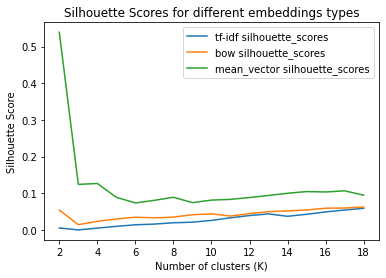

In [6]:
for values in scores:
    plt.plot(K, scores[values]["silhouette_scores"], label=f"{values} silhouette_scores")
    
plt.legend()
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")              
plt.title("Silhouette Scores for different embeddings types")
plt.show()

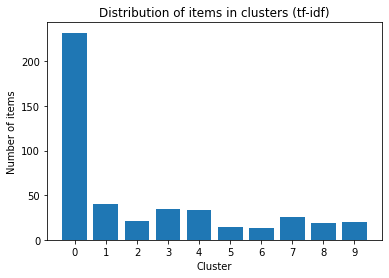

In [11]:
agglo = AgglomerativeClustering(n_clusters=10).fit(tf_idf)
labels = agglo.labels_
category_dist = np.unique(labels, return_counts=True)
plt.bar(category_dist[0], category_dist[1])
plt.xlabel("Cluster")
plt.xticks(category_dist[0])
plt.ylabel("Number of items")
plt.title("Distribution of items in clusters (tf-idf)")
plt.show()

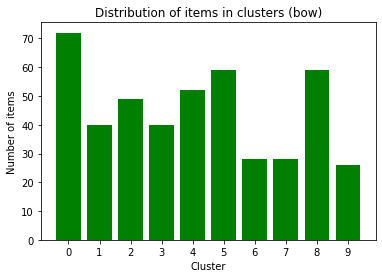

In [12]:
agglo = AgglomerativeClustering(n_clusters=10).fit(bow)
labels = agglo.labels_
category_dist = np.unique(labels, return_counts=True)
plt.bar(category_dist[0], category_dist[1], color='green')
plt.xlabel("Cluster")
plt.xticks(category_dist[0])
plt.ylabel("Number of items")
plt.title("Distribution of items in clusters (bow)")
plt.show()

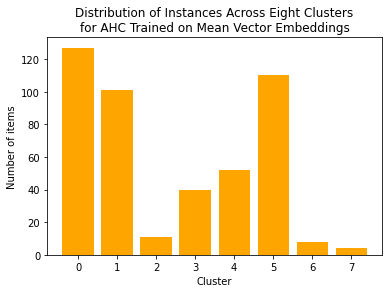

In [7]:
agglo = AgglomerativeClustering(n_clusters=8).fit(mean_vector)
labels = agglo.labels_
category_dist = np.unique(labels, return_counts=True)
plt.bar(category_dist[0], category_dist[1], color='orange')
plt.xlabel("Cluster")
plt.xticks(category_dist[0])
plt.ylabel("Number of items")
plt.title("Distribution of Instances Across Eight Clusters\nfor AHC Trained on Mean Vector Embeddings")
plt.show()

In [ ]:
tsne = TSNE(n_components=2, random_state=150)
tsne_results = tsne.fit_transform(np.array(mean_vector))
x = tsne_results[:, 0]
y = tsne_results[:, 1]

Text(0, 0.5, 't-SNE Component 2')

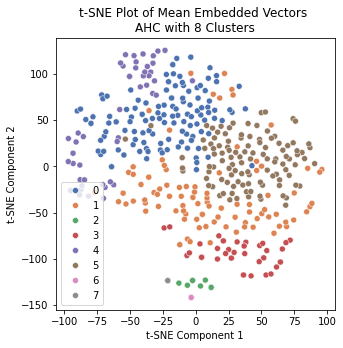

In [9]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=x, y=y, hue=agglo.labels_, palette="deep", legend="full")
plt.title("t-SNE Plot of Mean Embedded Vectors \nAHC with 8 Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

In [10]:
df["ACH_labels"] = agglo.labels_
df.to_csv('../../data/description_embeddings.csv', index=False)